In [0]:
"""
@author: SHREEKANTH
"""
import cv2
import math
import imutils
import numpy as np

img = cv2.imread(r'C:\Users\SHREEKANTH\Desktop\scan2.jpg')

img1 = img [:int(img.shape[0]/3),:int(img.shape[1]/2)]
img2 = img [:int(img.shape[0]/3),int(img.shape[1]/2):int(img.shape[1])-1]
#cv2.imshow('IMG1',img1)
#cv2.waitKey(0)
#cv2.imshow('IMG2',img2)
#cv2.waitKey(0)

# Apply template Matching

img3 = img.copy()
template = cv2.imread(r'C:\Users\SHREEKANTH\Desktop\template.jpg')
w=template.shape[0]
h=template.shape[1]

left_box = cv2.matchTemplate(img1,template,cv2.TM_SQDIFF)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(left_box)
top_left1 = min_loc
bottom_right1 = (top_left1[0] + w, top_left1[1] + h)
print('Initial top left box' , top_left1,bottom_right1)


right_box = cv2.matchTemplate(img2,template,cv2.TM_SQDIFF)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(right_box)
top_left2 = min_loc
bottom_right2 = (top_left2[0] + w, top_left2[1] + h)
print('Initial top right box',top_left2,bottom_right2)

#To rotate the image
t1 = top_left2[1] - top_left1[1]
t2 = int(img.shape[1]/2) + top_left2[0] - top_left1[0]
angle = np.arctan2(t1,t2)
angle = math.degrees(angle)
print('Angle to be rotated',angle)
            
rotated = imutils.rotate(img, angle)
#cv2.imshow('rot',rotated)
#cv2.waitKey(0)

img = rotated.copy()
cv2.imwrite('rot.jpg',img)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,175,255,cv2.THRESH_BINARY)

for j in range(thresh.shape[1]-int(img.shape[1]/2)-top_left2[0]):
    px = thresh[(top_left2[1]-60),(int(img.shape[1]/2)+top_left2[0]+j)]
#    print(px,(top_left2[1]-60),(int(img.shape[1]/2)+top_left2[0]+j))
    if px == 255:
        break;

print('Left side cropping factors', int(img.shape[1]/2)+top_left2[0]+j , j)
  
img3 = img[:int(img.shape[1]/3),:int(img.shape[0]/2)]
left_box = cv2.matchTemplate(img3,template,cv2.TM_SQDIFF)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(left_box)
top_left1 = min_loc
bottom_right1 = (top_left1[0] + w, top_left1[1] + h)
print('After rotation top left box' , top_left1,bottom_right1)

img4 = img[int(2*img.shape[0]/3):,:int(img.shape[0]/2)]
bottom_left_box = cv2.matchTemplate(img4,template,cv2.TM_SQDIFF)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(bottom_left_box)
top_left3 = min_loc
bottom_right3 = (top_left3[0] + w, top_left3[1] + h)
print('After rotation bottom most left box' , top_left3,bottom_right3)

bottom_crop = int(2*img.shape[0]/3) + bottom_right3[1] + 41  #41 is correction value
print('Bottom cropping factor',bottom_crop)

dim = (img.shape[1] , 2339)
cut_img = img[:bottom_crop,]
img = cv2.resize(cut_img, dim, interpolation = cv2.INTER_AREA)
cv2.imwrite('bot.jpg',img)

cut_img = img[(top_left1[1]-127):,: int(img.shape[1]/2)+top_left2[0]+j]
print('After croping size' , cut_img.shape)

if top_left1[0] <=20 :
    add = cv2.imread(r'C:\Users\SHREEKANTH\Desktop\add_on.jpg')
    ver = add[0:cut_img.shape[0],0:(20-top_left1[0])]
    to_resize = np.concatenate((ver,cut_img), axis=1)
else :
    to_resize = cut_img[ :cut_img.shape[0], (top_left1[0]-20):]
    
print('After concatenation if req',to_resize.shape)
#cv2.imshow('to_re',to_resize)
#cv2.waitKey(0)

dim = (1654,2339)
fin_img = cv2.resize(to_resize, dim, interpolation = cv2.INTER_AREA)

#l = fin_img[209:248,610:649]
#cv2.imshow('l',l)
#cv2.waitKey(0)

print('Final resized shape' , fin_img.shape)
#cv2.imshow('fin_img',fin_img)
#cv2.waitKey(0)
cv2.imwrite('fin.jpg',fin_img)


Initial top left box (52, 129) (89, 166)
Initial top right box (731, 141) (768, 178)
Angle to be rotated 0.4496633342560517
Left side cropping factors 1631 50
After rotation top left box (44, 135) (81, 172)
After rotation bottom most left box (47, 646) (84, 683)
Bottom cropping factor 2282
After croping size (2331, 1631, 3)
After concatenation if req (2331, 1607, 3)
Final resized shape (2339, 1654, 3)


True

In [0]:
from keras.models import load_model
alpha_num=load_model(r'C:\Users\SHREEKANTH\Desktop\OCR\alphanum2.model')
alpha_num.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

alpha=load_model(r'C:\Users\SHREEKANTH\Desktop\OCR\ocr.model')
alpha.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

numbers=load_model(r'C:\Users\SHREEKANTH\Desktop\OCR\num.model')
numbers.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

alphabets = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O',
            'P','Q','R','S','T','U','V','W','X','Y','Z','0','1','2','3','4','5','6','7','8','9']

s=""


I:\Anaco\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [0]:
import pandas as pd

df = pd.read_csv(r'C:\Users\SHREEKANTH\Desktop\OCR\coordinates2.csv')

tags = df.columns.tolist()

list1 = []  #field contains numbers only
list2 = []  #field contains charcters only
list3 = []  #field contains both

print('1.Number 2.Charcter 3.AlphaNumerical')

for tag in tags:
    print(tag)
    choice = int(input('Enter'))
    
    if choice == 1:
        list1.append(tag)
    elif choice == 2:
        list2.append(tag)
    elif choice == 3 :
        list3.append(tag)

print('Number Fields',list1)
print('Alphabet Fields',list2)
print('Alphanumerical Fields',list3)

1.Number 2.Charcter 3.AlphaNumerical
Employee Code
Enter3
OPTY ID
Enter2
TITLE
Enter2
NAME
Enter2
Maiden Name
Enter2
Mothers Maiden Name
Enter2
LINE 1
Enter3
LINE 2
Enter3
LINE 3
Enter3
CITY
Enter2
STATE
Enter2
Pincode
Enter1
Telephone No
Enter1
DOB
Enter1
Father/Spouse Name
Enter2
Preferred Mobile Number
Enter1
Number Fields ['Pincode', 'Telephone No', 'DOB', 'Preferred Mobile Number']
Alphabet Fields ['OPTY ID', 'TITLE', 'NAME', 'Maiden Name', 'Mothers Maiden Name', 'CITY', 'STATE', 'Father/Spouse Name']
Alphanumerical Fields ['Employee Code', 'LINE 1', 'LINE 2', 'LINE 3']


In [0]:
import pandas as pd

df = pd.read_csv(r'C:\Users\SHREEKANTH\Desktop\OCR\coordinates2.csv')

tags = df.columns.tolist()

for tag in tags:
    x = df[tag].tolist()
    y1 = int(x[0])
    y2 = int(x[1])
    x = x[2:]
    ind = x.index(max(x))
    x = x[:ind+1]
    x = [round(y) for y in x]
    z = 0
    
    
    for i in range(len(x)-1):
        character = fin_img[y1:y2,x[i]:x[i+1]]
        ret,character = cv2.threshold(character,230,255,cv2.THRESH_BINARY_INV)
        #cv2.imshow('Letter',character)
        #cv2.waitKey(0)
        #  Resizing the charcacter to 28x28 to pass it the model
        dim = (28,28)
        letter = cv2.resize(character, dim, interpolation = cv2.INTER_AREA)
        letter = cv2.cvtColor(letter,cv2.COLOR_BGR2GRAY)    
        
        if cv2.countNonZero(letter) == 0 :
            if z!=1:
                s = s + " "
                z = 1
            else :
                break; 
        else:
            x1 = np.array(letter)
            x1 = x1/255
            x1 = x1.reshape(1,28,28,1)
            if list1.__contains__(tag):
                classes = numbers.predict_classes(x1)
                s = s + alphabets[26+classes[0]]
            elif list2.__contains__(tag):
                classes = alpha.predict_classes(x1)
                s = s + alphabets[classes[0]]
            else :
                classes = alpha_num.predict_classes(x1)
                s = s + alphabets[classes[0]]
            z = 0
    
    print(tag,':',s)
    s=""


Employee Code : NU2MNE
OPTY ID : ARCDRKGHNTKL
TITLE : MR
NAME : KHREEKANTH RAGHNNATKXN 
Maiden Name :  
Mothers Maiden Name :  
LINE 1 : 189FBGJ 
LINE 2 : TYPEE3 QKTS5 
LINE 3 : 8L0CKS5 7 
CITY : NEYNELI 
STATE : TAMTL NADN 
Pincode : 607101
Telephone No :  
DOB : 78101490
Father/Spouse Name :  
Preferred Mobile Number : 1707160605


In [0]:
import pandas as pd

df = pd.read_csv(r'C:\Users\SHREEKANTH\Desktop\OCR\tick_box1.csv')
df = df.dropna()

tags = df.columns.tolist()

for tag in tags:
    x = df[tag].tolist()
    y1 = int(x[0])
    y2 = int(x[1])
    x = x[2:]
    i = 1
    
    while( i < len(x) ):
        character = fin_img[y1:y2,int(x[i]):int(x[i+1])]
        ret,character = cv2.threshold(character,230,255,cv2.THRESH_BINARY_INV)
        #cv2.imshow('Letter',character)
        #cv2.waitKey(0)
        dim = (28,28)
        letter = cv2.resize(character, dim, interpolation = cv2.INTER_AREA)
        letter = cv2.cvtColor(letter,cv2.COLOR_BGR2GRAY)    
        
        if cv2.countNonZero(letter) != 0 :
            s = s + x[i-1] + " "
        i = i + 3
    
    print(tag,':',s)
    s=""

Purpose : Current Account 
Group : 
Residential Status : Residential Indian 
Citizenship : 
Religion : Hindu 
Category : General 
Education : 
Gender : Male 
Marital Status : 
Annual Income : 0 - 2 Lakhs 


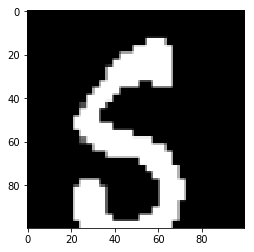

In [0]:
import matplotlib.pyplot as plt
import cv2
fin_img = cv2.imread(r'C:\Users\SHREEKANTH\Desktop\OCR\fin.jpg')

character = fin_img[474:505,248:281]
ret,character = cv2.threshold(character,230,255,cv2.THRESH_BINARY_INV)
#cv2.imshow('Letter',character)
#cv2.waitKey(0)
#  Resizing the charcacter to 28x28 to pass it the model
dim = (100,100)
letter = cv2.resize(character, dim, interpolation = cv2.INTER_AREA)
letter = cv2.cvtColor(letter,cv2.COLOR_BGR2GRAY)    
plt.imshow(letter,cmap='gray')        

#x1 = np.array(letter)
#x1 = x1/255
#x1 = x1.reshape(1,28,28,1)
#classes = model.predict_classes(x1)
#print(alphabet[classes[0]])


In [0]:
import pandas as pd

df = pd.read_csv(r'C:\Users\SHREEKANTH\Desktop\OCR\coordinates2.csv')

tags = df.columns.tolist()

tag = 'NAME'

x = df[tag].tolist()
y1 = int(x[0])
y2 = int(x[1])
x = x[2:]
ind = x.index(max(x))
x = x[:ind+1]
x = [round(y) for y in x]
z = 0
    
for i in range(len(x)-1):
    #cv2.imshow('Letter',character)
    #gray_image = cv2.cvtColor(fin_img, cv2.COLOR_BGR2GRAY)
    character = fin_img[y1:y2,x[i]:x[i+1]]
    cv2.imshow('Letter',character)
    ret,character = cv2.threshold(character,230,255,cv2.THRESH_BINARY_INV)
    #character = cv2.adaptiveThreshold(character,255,1,1,11,2)
    cv2.imshow('Letter',character)
    cv2.waitKey(0)


In [0]:
import pandas as pd
import numpy as np

df = pd.read_csv(r'C:\Users\SHREEKANTH\Desktop\number.csv')

tags = df.columns.tolist()

x = df['one'].tolist()
print(x)

a = np.array(x)
print(type(a))

a = np.resize(a,(28,28))
print(a.shape)

cv2.imshow('one',a)
cv2.waitKey(0)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 188, 255, 94, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 191, 250, 253, 93, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 123, 248, 253, 167, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 80, 247, 253, 208, 13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 29, 207, 253, 235, 77, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 54, 209, 253, 253, 88, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 93, 254, 253, 238, 170, 17, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

-1